<a href="https://colab.research.google.com/github/Upasna22/AdapterViews/blob/master/Copy_of_Copy_of_Encoding_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("Training data sample is")
#train_df.head(5)
print("Testing data sample is")
train_df.head(15)

Training data sample is
Testing data sample is


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0
5,5,0,1,1,T,N,Blue,Polygon,Lion,Costa Rica,Oboe,46cab09da,29a854620,ff5b35098,b7e6f8e6f,51e27c16d,1,Novice,Freezing,j,E,PZ,2,2,0
6,6,0,1,1,T,N,Green,Trapezoid,Cat,China,Piano,be5592604,3393a0f78,c6587685d,06f5ae149,7e3d79a0d,2,Grandmaster,Lava Hot,g,P,wy,5,4,0
7,7,1,0,1,T,Y,Red,Triangle,Dog,Russia,Oboe,72f8028dc,55eed5058,2dd9daf45,98addc2c9,feb72ecc2,1,Novice,Lava Hot,j,K,Ed,4,2,0
8,8,1,0,1,T,Y,Blue,Square,Hamster,Canada,Bassoon,4604905e7,3e44d44eb,3f0057c9b,a2d110837,34a7273bf,2,Novice,Boiling Hot,e,V,qo,3,4,0
9,9,0,0,0,F,Y,Red,Trapezoid,Lion,China,Piano,ad95dc0ee,8ed6221ae,4fbfe4a84,2c15d0173,0ece7a511,1,Expert,Freezing,h,Q,CZ,3,2,0


In [0]:
print('Training data has {} rows and {} columns'.format(train_df.shape[0], train_df.shape[1]))

Training data has 300000 rows and 25 columns


In [0]:
print('Testing dta haas {} rows and {} columns'.format(test_df.shape[0], train_df.shape[1]))

Testing dta haas 200000 rows and 25 columns


In [0]:
#Define target and train
X = train_df.drop(['target'],axis=1)
Y = train_df['target']
X.head()
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: target, dtype: int64

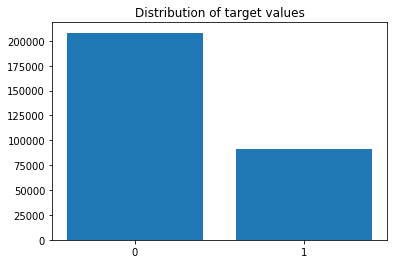

In [0]:
#Target Distribution
target = Y.value_counts()
plt.bar(target.index, target)
plt.gca().set_xticks([0,1])
plt.title('Distribution of target values')
plt.show()

In [0]:
#Label Encoding : assigning a number to each categorical value
from sklearn.preprocessing import LabelEncoder
from sklearn import base

labelEncodedTrain = pd.DataFrame()
LabelEncoder = LabelEncoder()
for col in X.columns:
  if(X[col].dtype == 'object'):
    labelEncodedTrain[col] = LabelEncoder.fit_transform(X[col])
  else:
    labelEncodedTrain[col] = X[col]
print('Label Encoded Train looks like \n{}'.format(labelEncodedTrain.head(15)))
print(labelEncodedTrain.shape)

Label Encoded Train looks like 
    id  bin_0  bin_1  bin_2  bin_3  ...  ord_3  ord_4  ord_5  day  month
0    0      0      0      0      1  ...      7      3    136    2      2
1    1      0      1      0      1  ...      0      0     93    7      8
2    2      0      0      0      0  ...      7     17     31    7      2
3    3      0      1      0      0  ...      8      3    134    2      1
4    4      0      0      0      0  ...      0     17    158    7      8
5    5      0      1      1      1  ...      9      4     53    2      2
6    6      0      1      1      1  ...      6     15    185    5      4
7    7      1      0      1      1  ...      9     10     17    4      2
8    8      1      0      1      1  ...      4     21    160    3      4
9    9      0      0      0      0  ...      7     16     11    3      2
10  10      0      1      0      1  ...      6     17    159    3     10
11  11      0      1      0      1  ...      8     25    170    7      2
12  12      0      

In [0]:
#Logistic Regression : since its a classification problem
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def logisticRegressor(X, Y):
  X_train,X_test,Y_train,Y_actualtest = train_test_split(X, Y, random_state=42, test_size=0.2)
  LR=LogisticRegression()
  LR.fit(X_train, Y_train)
  Y_predicttest = LR.predict(X_test)
  print('Confusion matrix : \n{}'.format(confusion_matrix(Y_actualtest, Y_predicttest)))
  print('Accuracy Score : \n {}'.format(accuracy_score(Y_actualtest, Y_predicttest)))
  print('Claassification report : \n {}'.format(classification_report(Y_actualtest, Y_predicttest)))

In [0]:
logisticRegressor(labelEncodedTrain, Y)

Confusion matrix : 
[[40778   899]
 [17662   661]]
Accuracy Score : 
 0.69065
Claassification report : 
               precision    recall  f1-score   support

           0       0.70      0.98      0.81     41677
           1       0.42      0.04      0.07     18323

    accuracy                           0.69     60000
   macro avg       0.56      0.51      0.44     60000
weighted avg       0.61      0.69      0.59     60000



In [0]:
#One Hot Encoding : Takes a categorical value and converts it to a binary vector of size n(no:of values in category)

from sklearn.preprocessing import OneHotEncoder

oneHotencoder = OneHotEncoder(handle_unknown='ignore')
oneHotencoder.fit(X)
oneHotEncodedTrain = oneHotencoder.transform(X)
print('One Hot Encoded train data looks like:\n {}'.format(oneHotEncodedTrain))
print('One Hot Endcoded data has {} rows and {} columns'.format(oneHotEncodedTrain.shape[0], oneHotEncodedTrain.shape[1]))



One Hot Encoded train data looks like:
   (0, 0)	1.0
  (0, 300000)	1.0
  (0, 300002)	1.0
  (0, 300004)	1.0
  (0, 300007)	1.0
  (0, 300009)	1.0
  (0, 300011)	1.0
  (0, 300018)	1.0
  (0, 300024)	1.0
  (0, 300028)	1.0
  (0, 300031)	1.0
  (0, 300113)	1.0
  (0, 300377)	1.0
  (0, 301270)	1.0
  (0, 303685)	1.0
  (0, 306389)	1.0
  (0, 316196)	1.0
  (0, 316200)	1.0
  (0, 316204)	1.0
  (0, 316216)	1.0
  (0, 316227)	1.0
  (0, 316386)	1.0
  (0, 316443)	1.0
  (0, 316450)	1.0
  (1, 1)	1.0
  :	:
  (299998, 316456)	1.0
  (299999, 299999)	1.0
  (299999, 300000)	1.0
  (299999, 300002)	1.0
  (299999, 300004)	1.0
  (299999, 300006)	1.0
  (299999, 300009)	1.0
  (299999, 300010)	1.0
  (299999, 300017)	1.0
  (299999, 300021)	1.0
  (299999, 300030)	1.0
  (299999, 300031)	1.0
  (299999, 300094)	1.0
  (299999, 300538)	1.0
  (299999, 301669)	1.0
  (299999, 303662)	1.0
  (299999, 312223)	1.0
  (299999, 316197)	1.0
  (299999, 316198)	1.0
  (299999, 316205)	1.0
  (299999, 316217)	1.0
  (299999, 316241)	1.0
  (29999

In [0]:
logisticRegressor(oneHotEncodedTrain, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion matrix : 
[[36506  5171]
 [ 9400  8923]]
Accuracy Score : 
 0.75715
Claassification report : 
               precision    recall  f1-score   support

           0       0.80      0.88      0.83     41677
           1       0.63      0.49      0.55     18323

    accuracy                           0.76     60000
   macro avg       0.71      0.68      0.69     60000
weighted avg       0.75      0.76      0.75     60000

